In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.duplicated().sum()

723

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

1    526
0    499
Name: target, dtype: int64


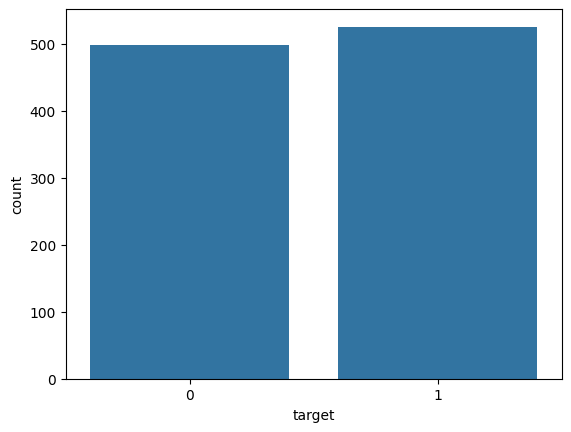

In [ ]:
sns.countplot(x = "target", data = df)

target_temp = df.target.value_counts()

print(target_temp)

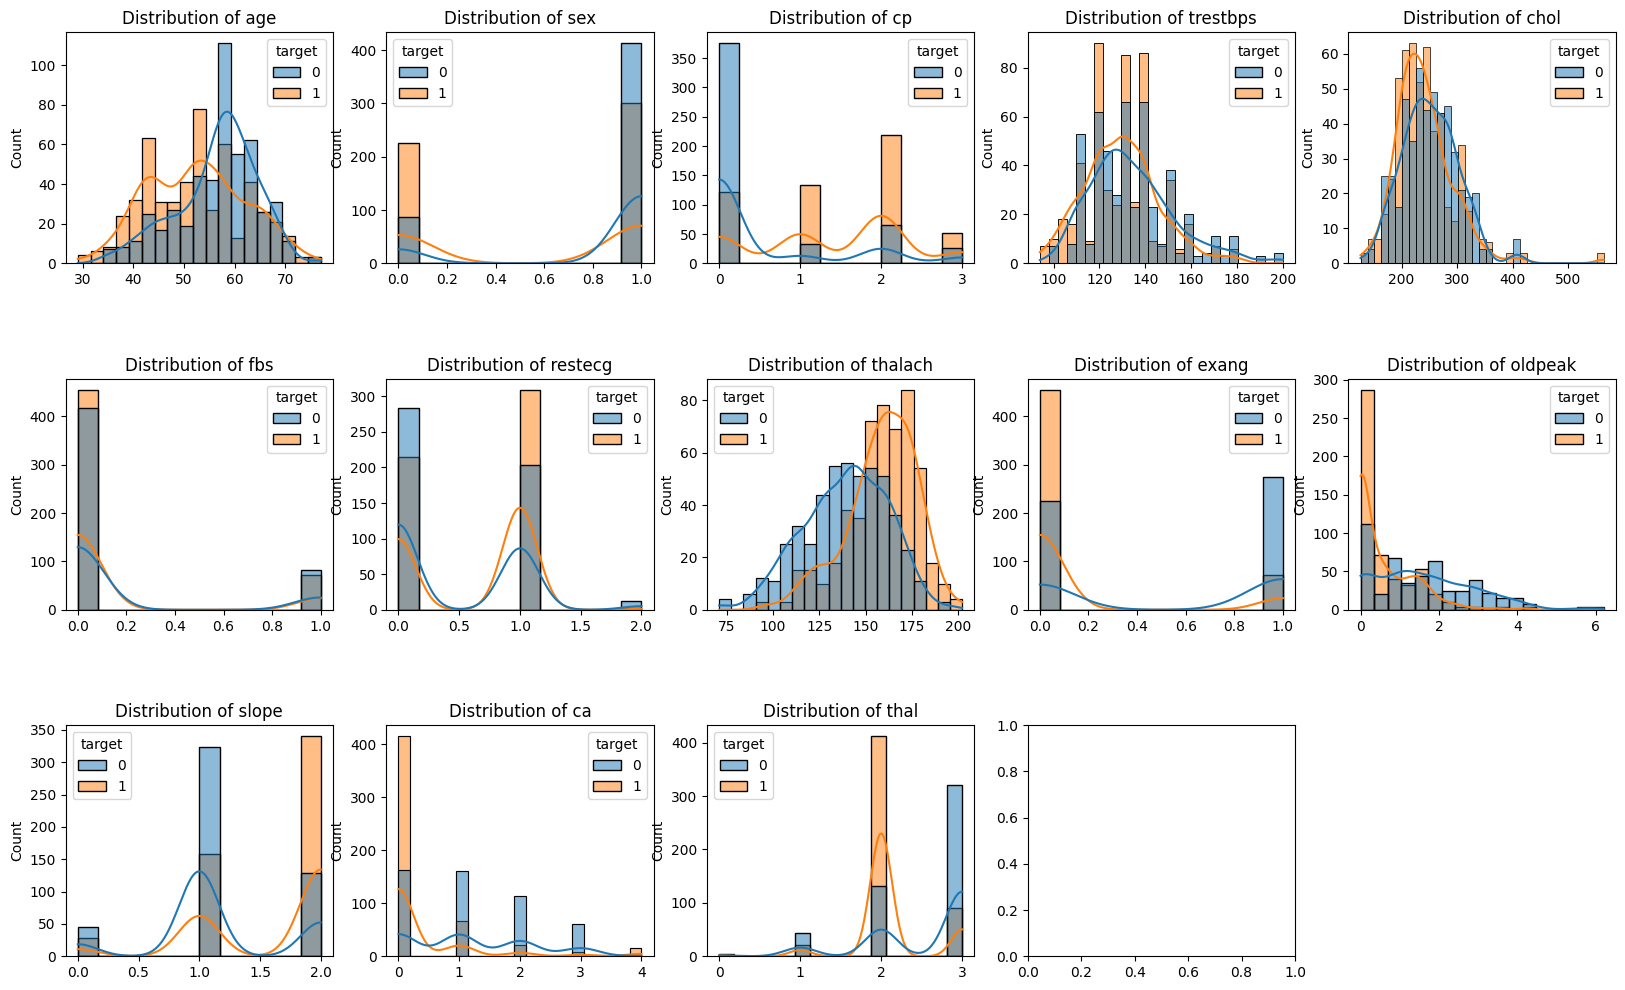

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=column, hue='target', kde=True, ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(f'Distribution of {column}')
    axes[i // 5, i % 5].set_xlabel('')
    axes[i // 5, i % 5].set_ylabel('Count')

axes[-1, -1].axis('off')
plt.show()

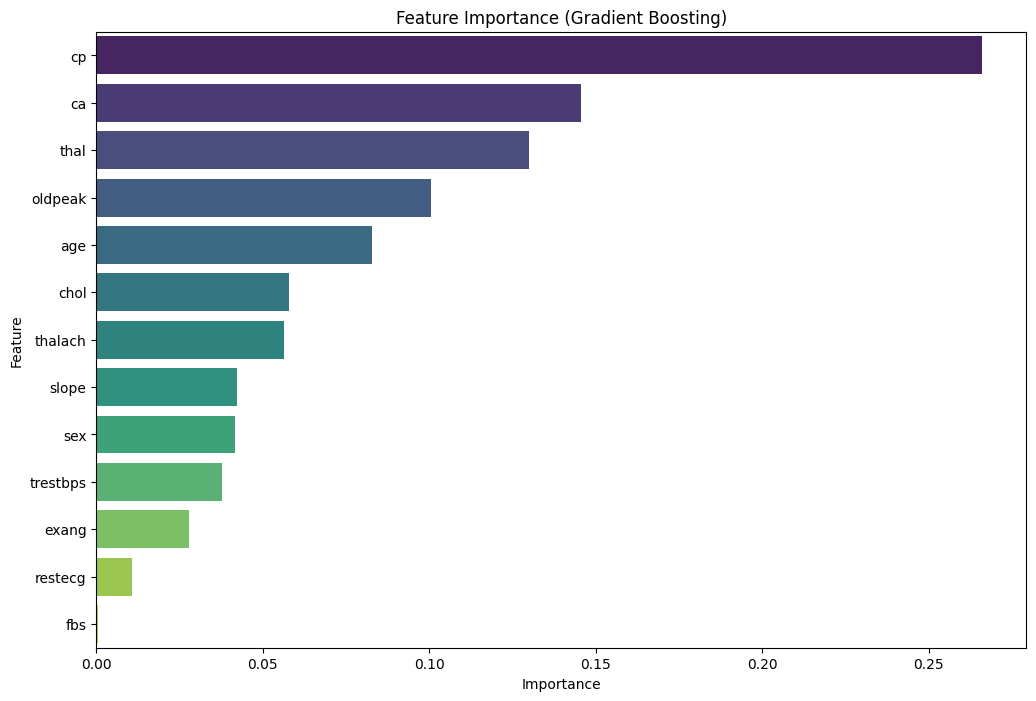

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X = df.drop('target', axis=1)
y = df['target']

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_classifier.fit(X, y)

feature_importances = gb_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

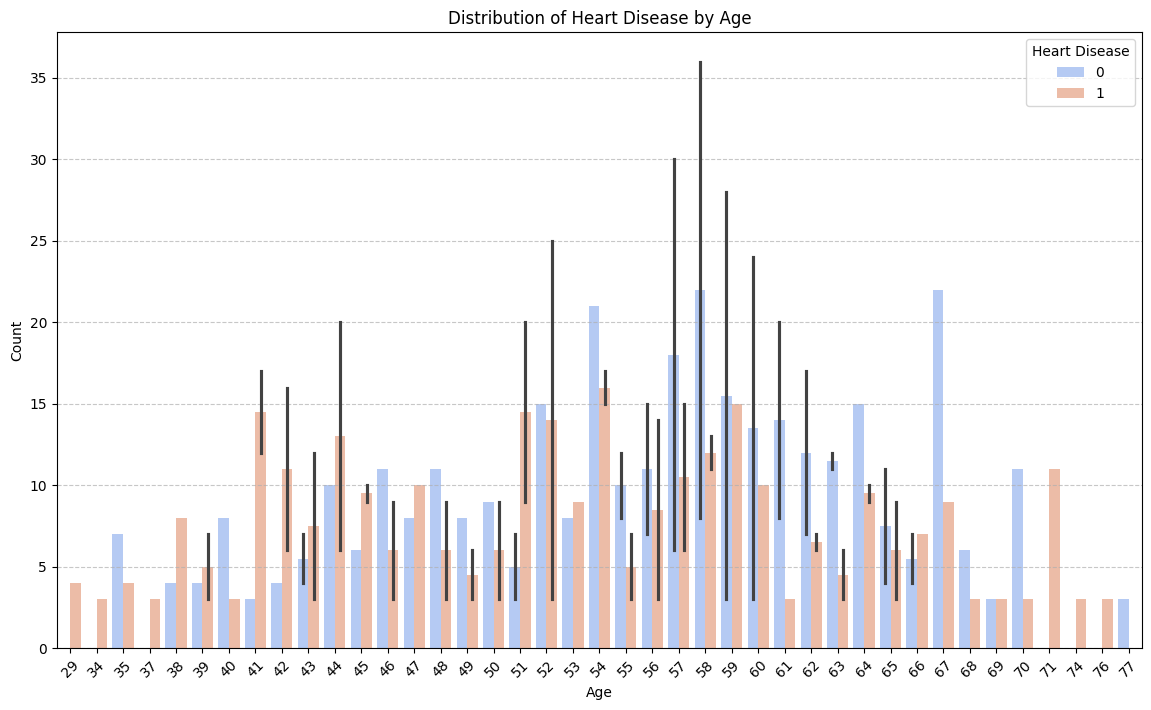

In [ ]:
grouped_data = df.groupby(['age', 'sex', 'target']).size().reset_index(name='count')

# Create a bar plot to visualize the distribution of the target variable by age and sex
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='age', y='count', hue='target', palette='coolwarm')
plt.title('Distribution of Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

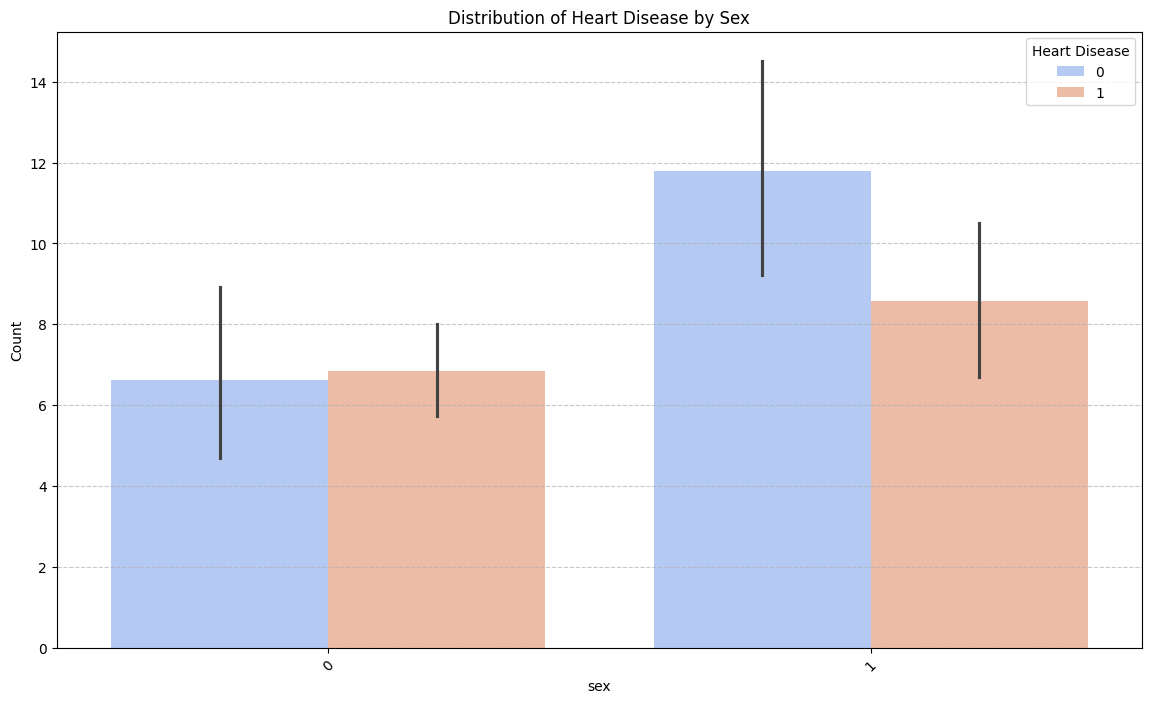

In [ ]:
grouped_data = df.groupby(['age', 'sex', 'target']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_data, x='sex', y='count', hue='target', palette='coolwarm')
plt.title('Distribution of Heart Disease by Sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

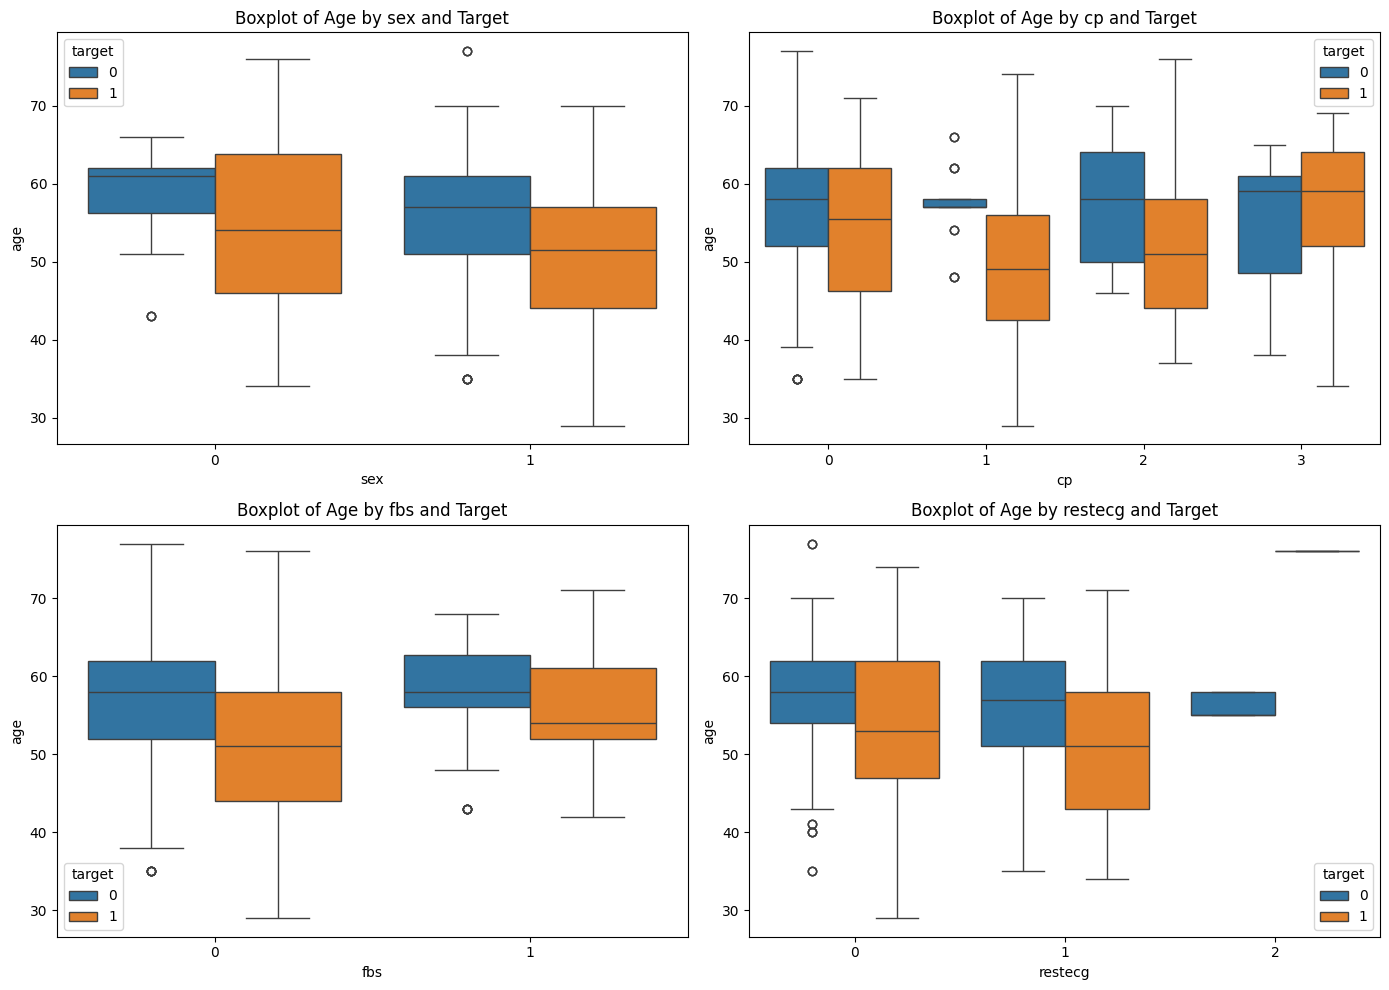

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
for ax, column in zip(axes.flatten(), ['sex', 'cp', 'fbs', 'restecg']):
    sns.boxplot(data=df, x=column, y='age', hue='target', ax=ax)
    ax.set_title(f'Boxplot of Age by {column} and Target')
plt.tight_layout()
plt.show()

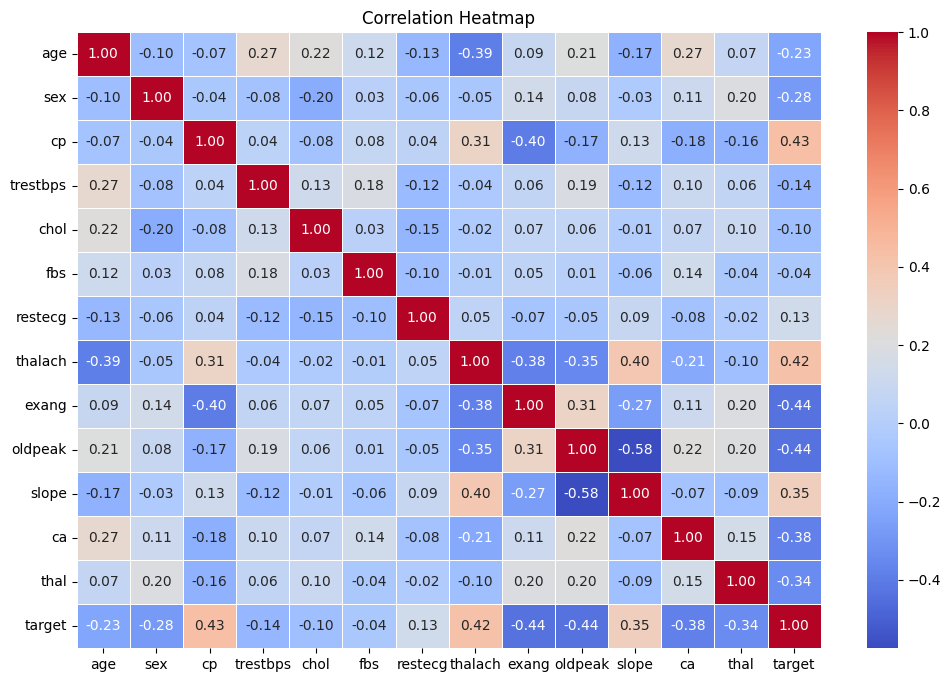

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

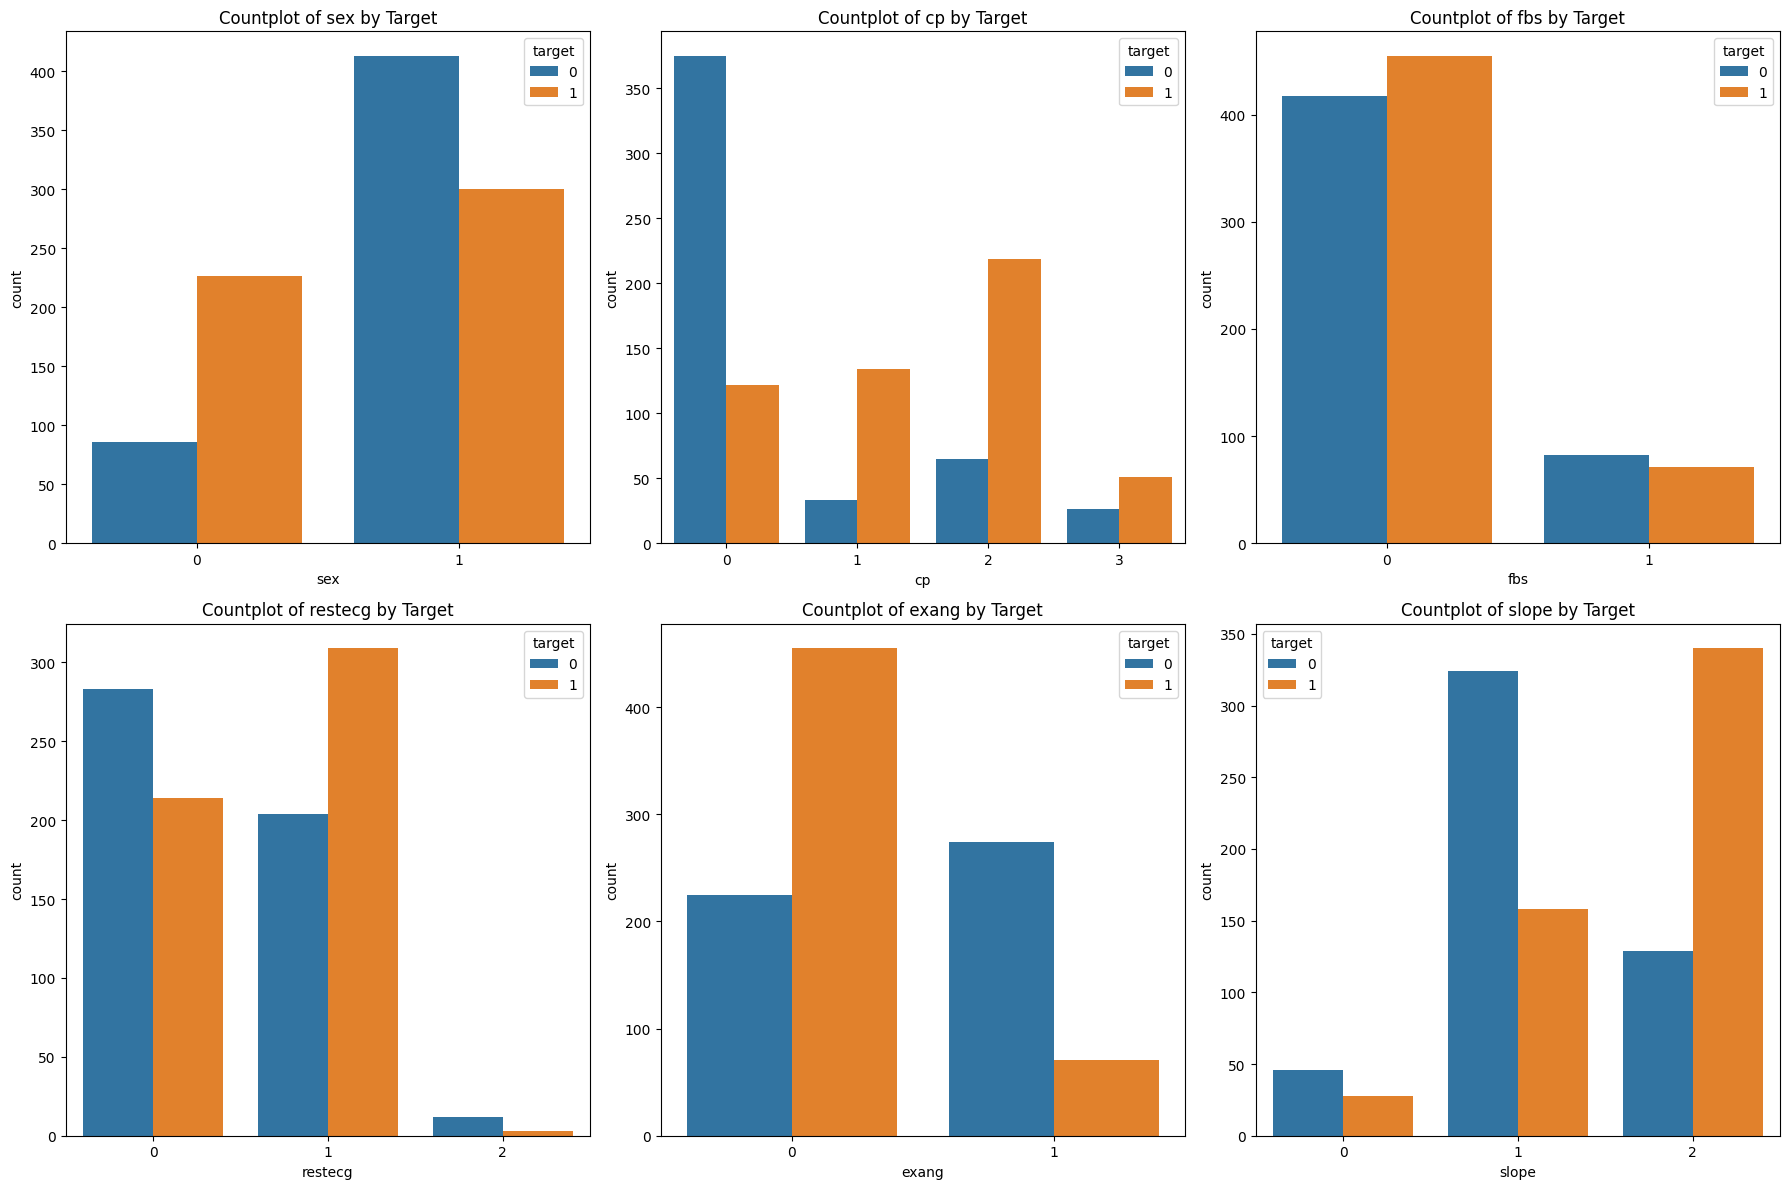

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for ax, column in zip(axes.flatten(), ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']):
    sns.countplot(data=df, x=column, hue='target', ax=ax)
    ax.set_title(f'Countplot of {column} by Target')
plt.tight_layout()
plt.show()

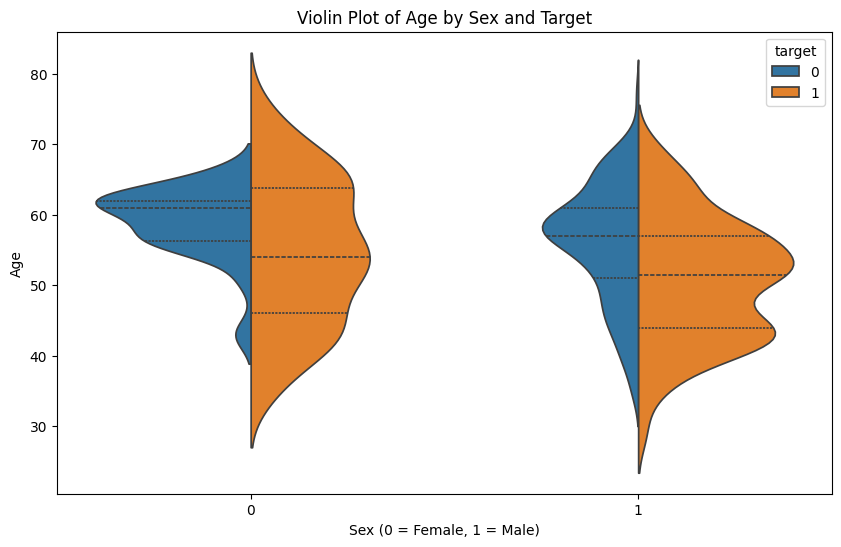

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='sex', y='age', hue='target', split=True, inner='quartile')
plt.title('Violin Plot of Age by Sex and Target')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Age')
plt.show()

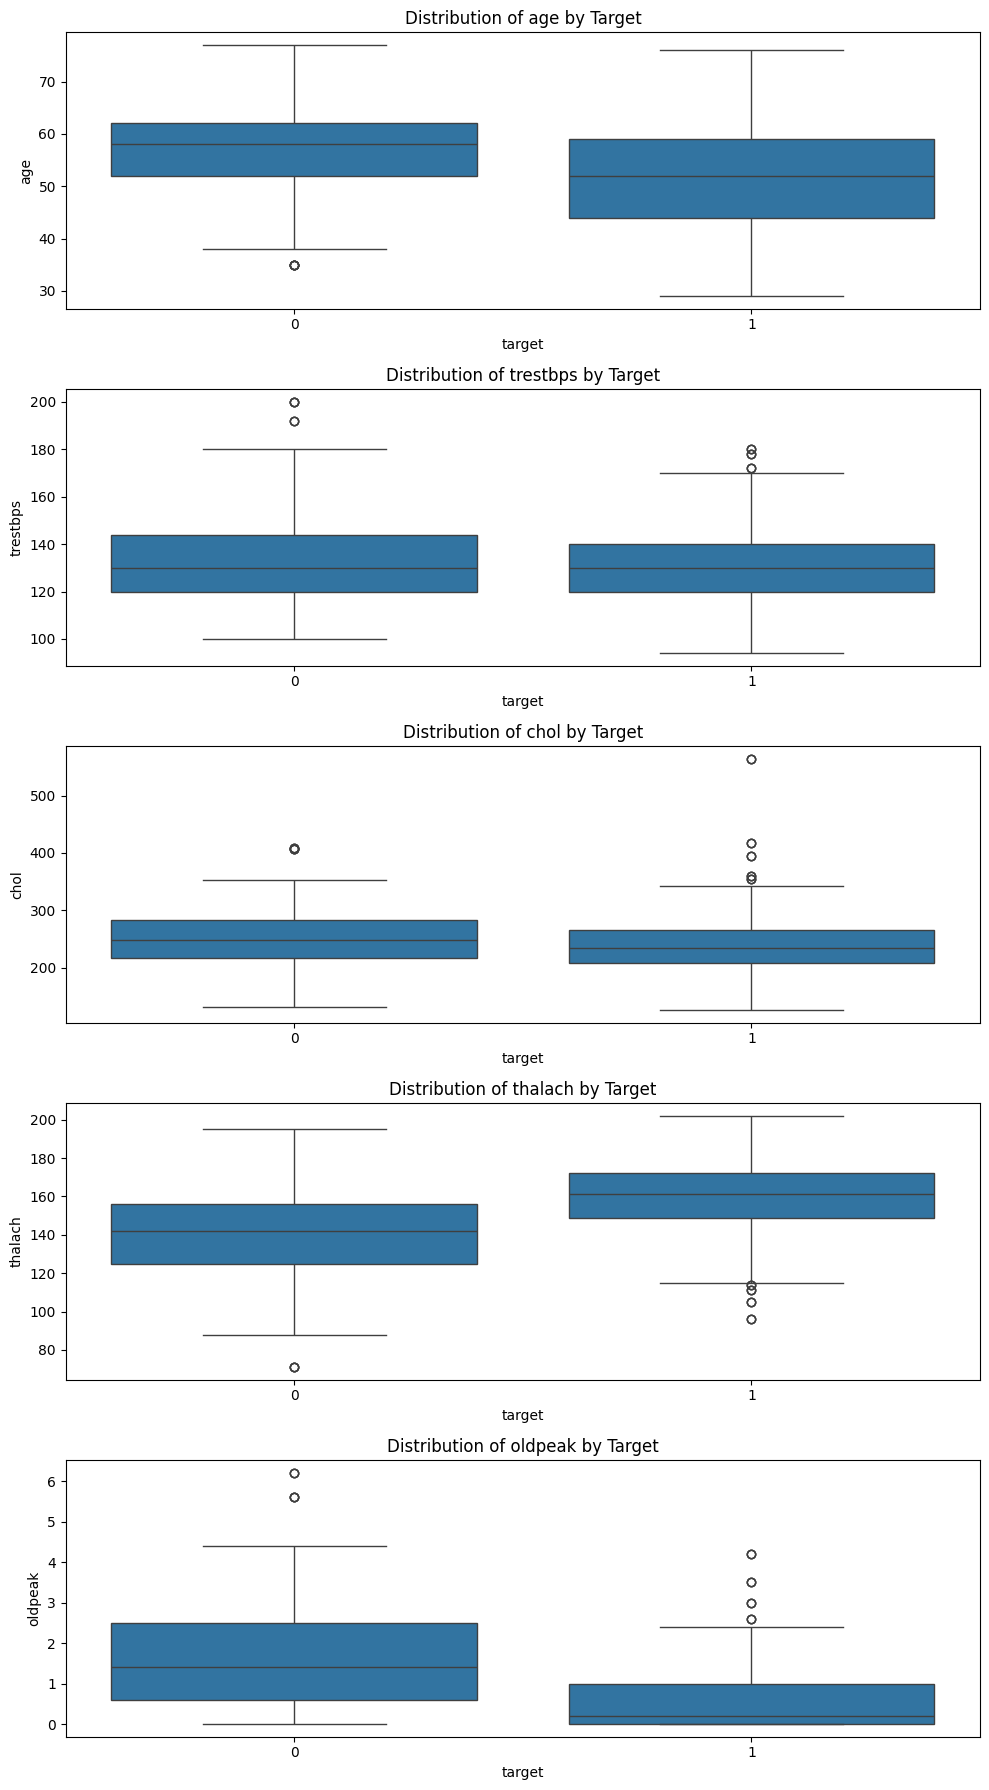

In [ ]:
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig, axes = plt.subplots(nrows=len(numerical_vars), ncols=1, figsize=(10, 18))
for i, var in enumerate(numerical_vars):
    sns.boxplot(data=df, x='target', y=var, ax=axes[i])
    axes[i].set_title(f'Distribution of {var} by Target')
plt.tight_layout()
plt.show()

In [ ]:
min_age = df['age'].min()
max_age = df['age'].max()

print(f"The range of age in the dataset is from {min_age} to {max_age} years.")

The range of age in the dataset is from 29 to 77 years.


In [ ]:
pip install fairlearn


In [ ]:
pip install aif360

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing

# Load the dataset
heart_data = pd.read_csv('heart.csv')

# Separate features and target variable
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set hyperparameters (these can be adjusted as needed)
hyperparameters = {
    'n_estimators': 255,  # ntrees
    'max_depth': 8,     # max_depth
    'min_samples_split': 10,   # min_rows
    'learning_rate': 0.1,   # learn_rate
    'subsample': 0.8,     # sample_rate
    'max_features': 0.8,   # col_sample_rate
    'random_state': 7     # seed
}

# Define protected attributes and unprivileged values
protected_attributes = [
    {'oldpeak': oldpeak_val, 'fbs': fbs_val, 'sex': sex_val}
    for oldpeak_val in [0, 1]  # Assuming 0 is unprivileged for oldpeak
    for fbs_val in [0, 1]  # Assuming 0 is unprivileged for fbs
    for sex_val in [0, 1]
]

# Create BinaryLabelDataset with combined attributes
dataset_train = BinaryLabelDataset(
    df=pd.concat([X_train, y_train], axis=1),
    label_names=['target'],
    protected_attribute_names=['oldpeak', 'fbs', 'sex'],  # Specify all 3 attributes
    unprivileged_protected_attributes=protected_attributes
)

# Apply reweighing with combined attributes
reweighing = Reweighing(unprivileged_groups=protected_attributes, privileged_groups=[{'oldpeak': 1, 'fbs': 1, 'sex': 1}])
dataset_train_reweighed = reweighing.fit_transform(dataset_train)

# Train and predict using the reweighed data
classifier_reweighed = GradientBoostingClassifier(**hyperparameters)
classifier_reweighed.fit(dataset_train_reweighed.features, dataset_train_reweighed.labels.ravel())
y_pred_reweighed = classifier_reweighed.predict(X_test)

# Calculate overall accuracy
accuracy_reweighed = accuracy_score(y_test, y_pred_reweighed)
print("Combined accuracy after bias mitigation (Reweighing, all features):", accuracy_reweighed)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from fairlearn.metrics import equalized_odds_difference, demographic_parity_difference

# Load the dataset
data = pd.read_csv('heart.csv')

# Preprocess the data
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
hyperparameters = {
    'n_estimators': 255,
    'max_depth': 8,
    'min_samples_split': 10,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'max_features': 0.8,
    'random_state': 7
}

# Initialize and train the GradientBoostingClassifier
clf = GradientBoostingClassifier(**hyperparameters)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate bias measures for all features
bias_measures = {}

for feature in X_test.columns:
    eod = equalized_odds_difference(y_test, y_pred, sensitive_features=X_test[feature])
    spd = demographic_parity_difference(y_test, y_pred, sensitive_features=X_test[feature])
    bias_measures[feature] = {'EOD': eod, 'SPD': spd}

# Print bias measures for all features
for feature, measures in bias_measures.items():
    print(f"Feature: {feature}")
    print("Equalized Odds Difference (EOD):", measures['EOD'])
    print("Statistical Parity Difference (SPD):", measures['SPD'])
    print()


Feature: age
Equalized Odds Difference (EOD): 1.0
Statistical Parity Difference (SPD): 1.0

Feature: sex
Equalized Odds Difference (EOD): 0.061224489795918324
Statistical Parity Difference (SPD): 0.30848048833660346

Feature: cp
Equalized Odds Difference (EOD): 0.125
Statistical Parity Difference (SPD): 0.6424242424242423

Feature: trestbps
Equalized Odds Difference (EOD): 1.0
Statistical Parity Difference (SPD): 1.0

Feature: chol
Equalized Odds Difference (EOD): 1.0
Statistical Parity Difference (SPD): 1.0

Feature: fbs
Equalized Odds Difference (EOD): 0.03448275862068961
Statistical Parity Difference (SPD): 0.0035236081747709314

Feature: restecg
Equalized Odds Difference (EOD): 0.08571428571428574
Statistical Parity Difference (SPD): 0.27027027027027034

Feature: thalach
Equalized Odds Difference (EOD): 1.0
Statistical Parity Difference (SPD): 1.0

Feature: exang
Equalized Odds Difference (EOD): 0.03157894736842104
Statistical Parity Difference (SPD): 0.5143243852921272

Feature: o

In [ ]:
from aif360.algorithms.preprocessing import Reweighing
from aif360.datasets import BinaryLabelDataset

biased_features = [ 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# Combine all biased features into a single protected attribute
combined_protected_attributes = [
    {feature: value}
    for feature in biased_features
    for value in data[feature].unique()
]

# Create BinaryLabelDataset with combined attributes
combined_dataset_train = BinaryLabelDataset(
    df=pd.concat([X_train, y_train], axis=1),
    label_names=['target'],
    protected_attribute_names=biased_features,
    unprivileged_protected_attributes=combined_protected_attributes
)

# Apply reweighing with combined attributes
reweighing = Reweighing(unprivileged_groups=combined_protected_attributes, privileged_groups=[{feature: 1} for feature in biased_features])
combined_dataset_train_reweighed = reweighing.fit_transform(combined_dataset_train)

# Use the reweighted dataset for model training
X_train_reweighed = combined_dataset_train_reweighed.features
y_train_reweighed = combined_dataset_train_reweighed.labels.ravel()


In [ ]:
type(X_train_reweighed)

numpy.ndarray

In [ ]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_reweighed, y_train_reweighed, test_size=0.2, random_state=42)

# Define hyperparameters for GradientBoostingClassifier
hyperparameters = {
    'n_estimators': 255,
    'max_depth': 8,
    'min_samples_split': 10,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'max_features': 0.8,
    'random_state': 7
}

# Initialize and train the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(**hyperparameters)
gb_classifier.fit(X_train_split, y_train_split)

GradientBoostingClassifier(max_depth=8, max_features=0.8, min_samples_split=10,
                           n_estimators=255, random_state=7, subsample=0.8)

In [ ]:
# Predict on the test set
from sklearn.metrics import accuracy_score, classification_report

y_pred = gb_classifier.predict(X_test_split)

# Evaluate the model performance
accuracy = accuracy_score(y_test_split, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test_split, y_pred))

Accuracy: 0.9939024390243902
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        80
         1.0       0.99      1.00      0.99        84

    accuracy                           0.99       164
   macro avg       0.99      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164



In [ ]:
with open("sklearn_gbm_model.pkl", "wb") as file:
    pickle.dump(gb_classifier, file)